<a href="https://colab.research.google.com/github/greeshman32/Greeshman/blob/master/House_Price_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt

pd.pandas.set_option('display.max_columns',None)
#to display all the columns

In [38]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
samp=pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
for i in train.columns:
  if train[i].isnull().sum()>0:
    print(np.round(train[i].isnull().sum()/1460,3)*100," ",i)

17.7   LotFrontage
93.8   Alley
0.5   MasVnrType
0.5   MasVnrArea
2.5   BsmtQual
2.5   BsmtCond
2.6   BsmtExposure
2.5   BsmtFinType1
2.6   BsmtFinType2
0.1   Electrical
47.3   FireplaceQu
5.5   GarageType
5.5   GarageYrBlt
5.5   GarageFinish
5.5   GarageQual
5.5   GarageCond
99.5   PoolQC
80.80000000000001   Fence
96.3   MiscFeature


In [6]:
data_with_na=[i for i in train.columns if train[i].isnull().sum()>0]

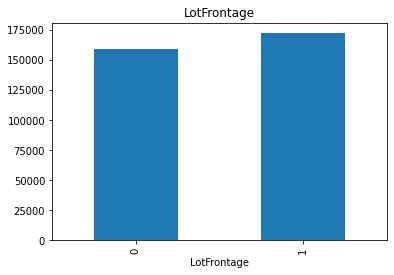

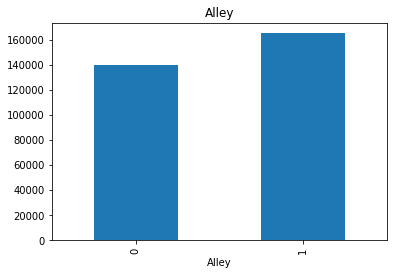

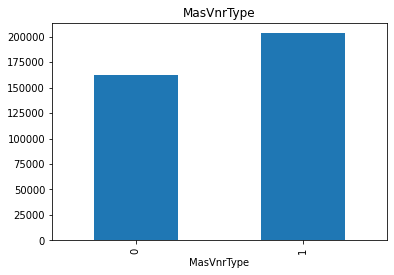

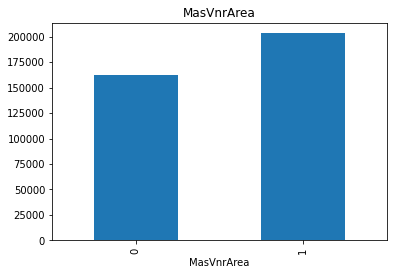

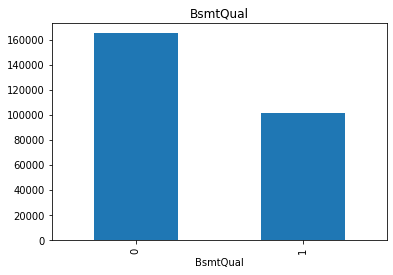

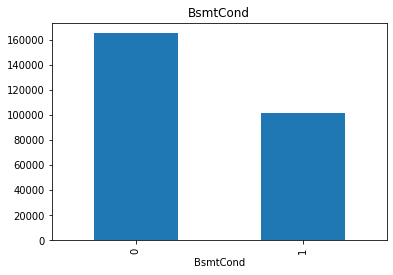

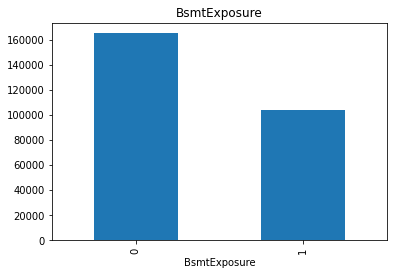

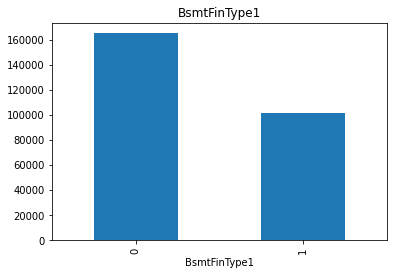

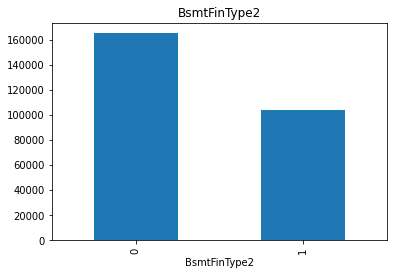

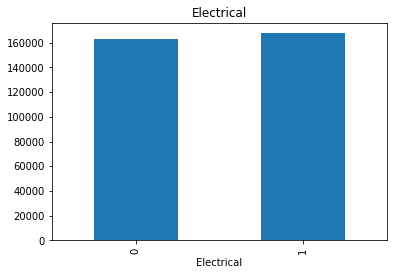

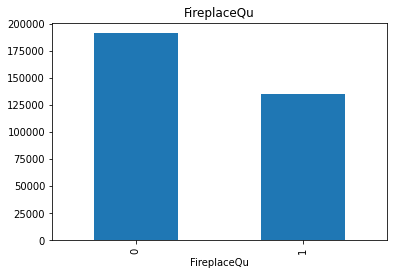

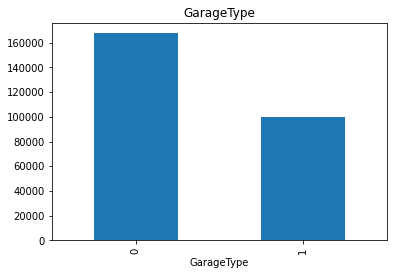

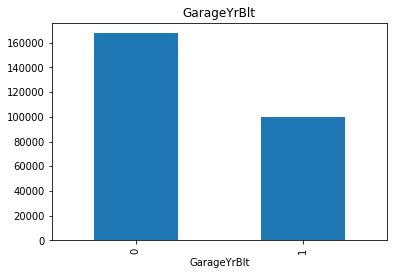

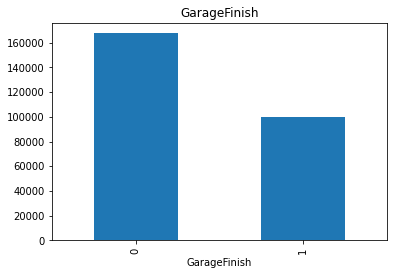

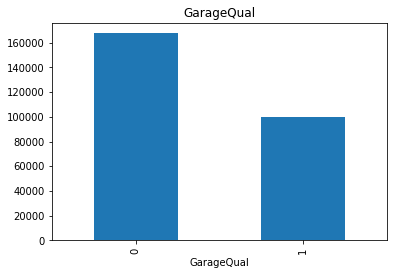

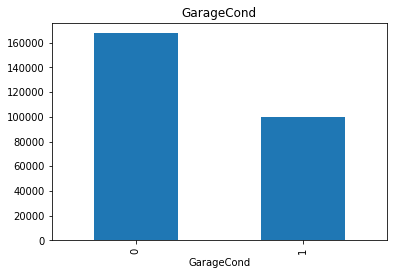

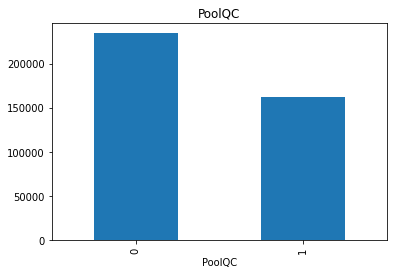

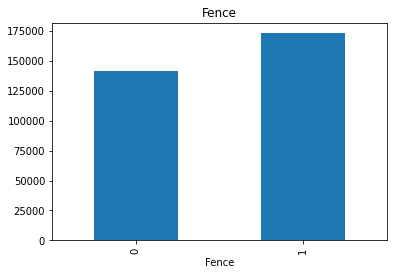

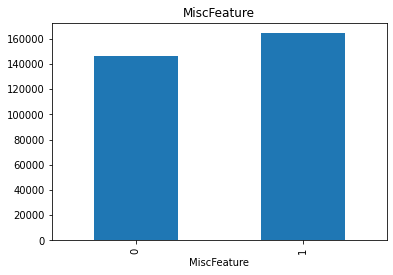

In [7]:
temp=train
for i in data_with_na:
  temp[i]= np.where(temp[i].isnull(),1,0)
  temp.groupby(i)['SalePrice'].median().plot.bar()
  plt.title(i)
  plt.show()

In [8]:
 data_with_year=[i for i in train.columns if 'Yr' in i or 'Year' in i]
 print(data_with_year)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


<function matplotlib.pyplot.show>

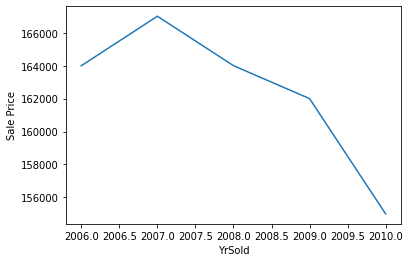

In [9]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YrSold')
plt.ylabel('Sale Price')
plt.show

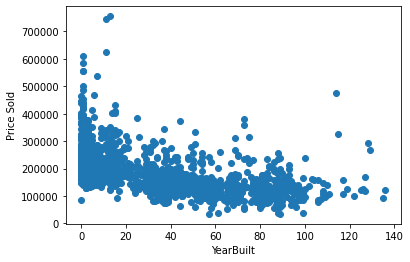

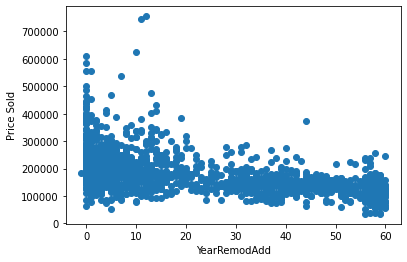

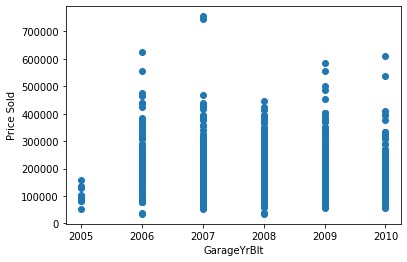

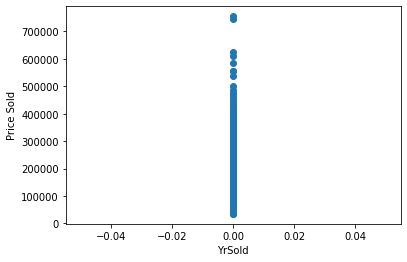

In [10]:
for i in data_with_year:
  temp[i]=temp['YrSold']-temp[i]
  plt.scatter(temp[i],temp['SalePrice'])
  plt.ylabel('Price Sold')
  plt.xlabel(i)
  plt.show()

In [11]:
discreat=[i for i in train.columns if len(train[i].unique())<20 and i not in data_with_year and train[i].dtype!= object]

In [12]:
discreat

['MSSubClass',
 'LotFrontage',
 'Alley',
 'OverallQual',
 'OverallCond',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold']

In [13]:
train[discreat].head()

,MSSubClass,LotFrontage,Alley,OverallQual,OverallCond,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PoolArea,PoolQC,Fence,MiscFeature,MoSold
0,60,0,1,7,5,0,0,0,0,0,0,0,0,1,0,2,1,3,1,8,0,1,0,0,2,0,0,0,1,1,1,2
1,20,0,1,6,8,0,0,0,0,0,0,0,0,0,1,2,0,3,1,6,1,0,0,0,2,0,0,0,1,1,1,5
2,60,0,1,7,5,0,0,0,0,0,0,0,0,1,0,2,1,3,1,6,1,0,0,0,2,0,0,0,1,1,1,9
3,70,0,1,7,5,0,0,0,0,0,0,0,0,1,0,1,0,3,1,7,1,0,0,0,3,0,0,0,1,1,1,2
4,60,0,1,8,5,0,0,0,0,0,0,0,0,1,0,2,1,4,1,9,1,0,0,0,3,0,0,0,1,1,1,12


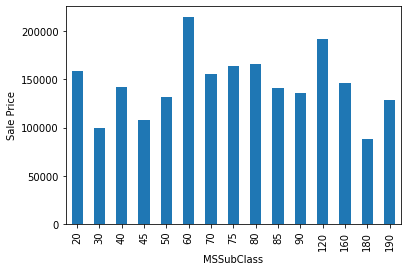

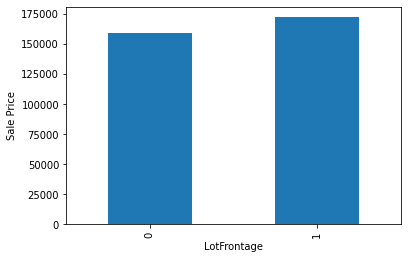

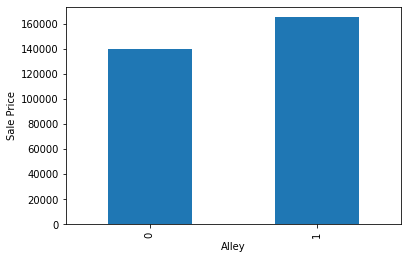

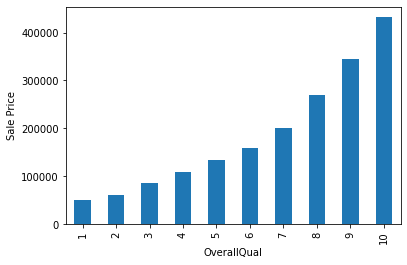

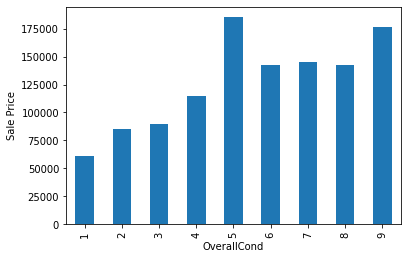

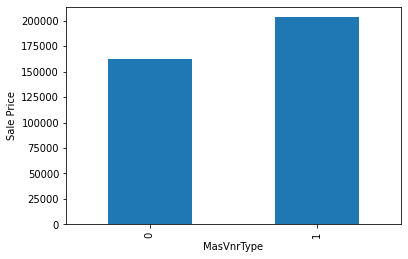

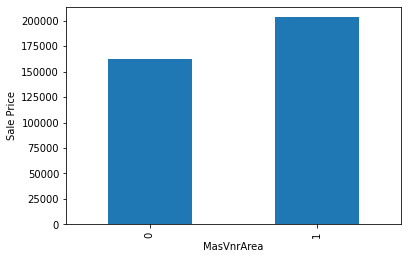

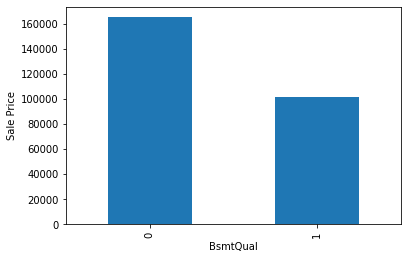

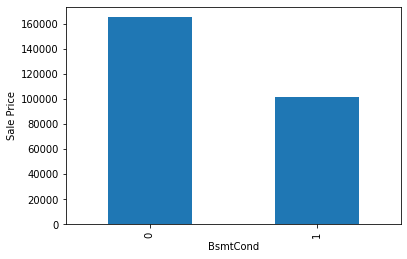

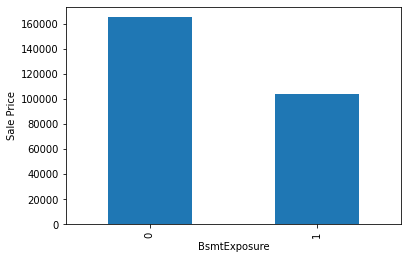

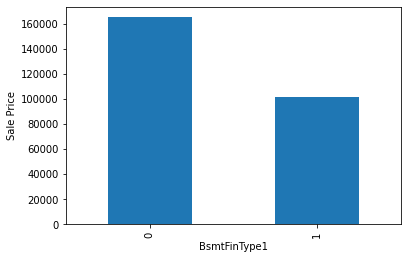

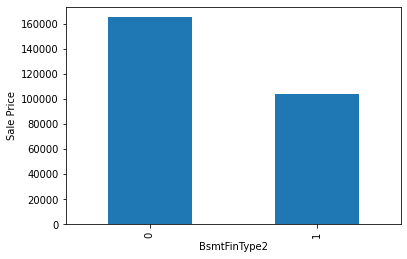

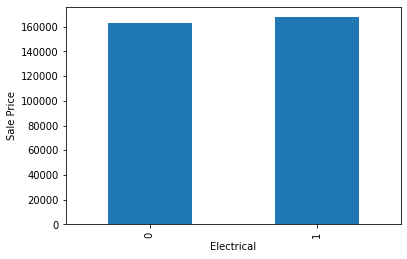

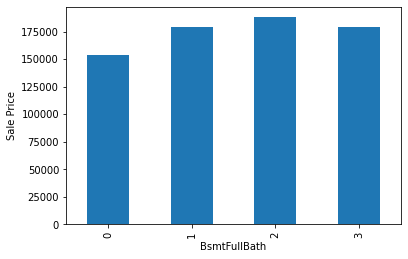

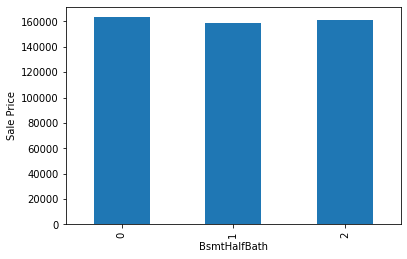

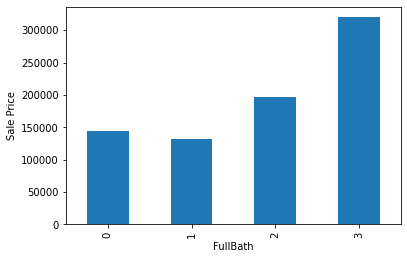

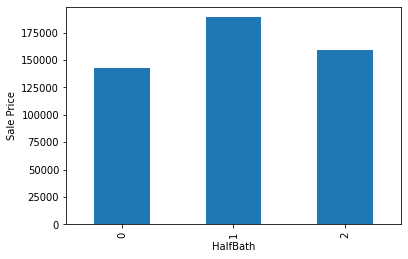

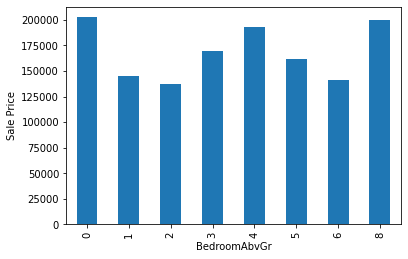

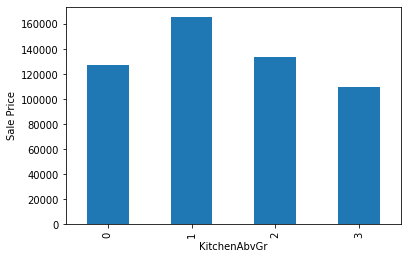

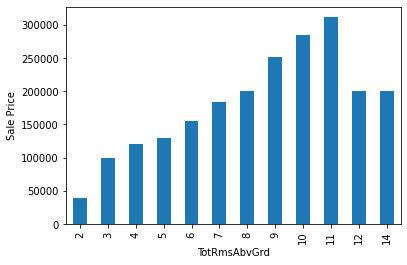

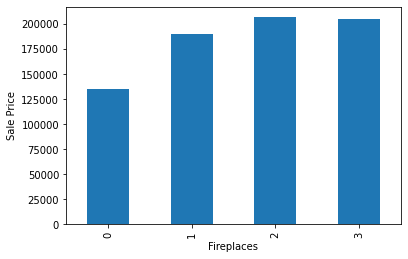

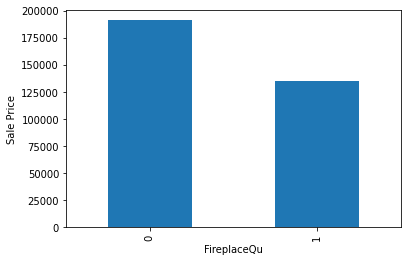

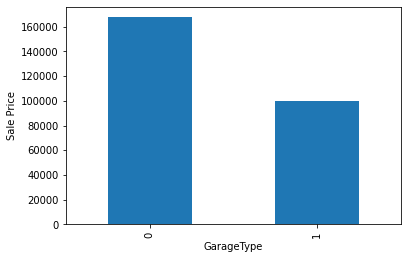

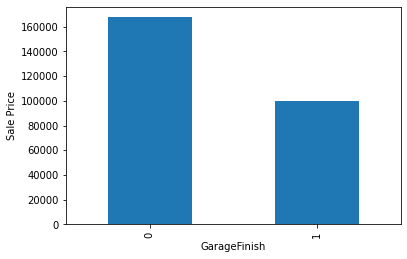

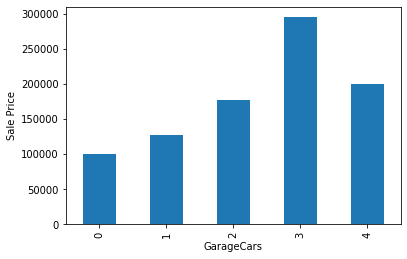

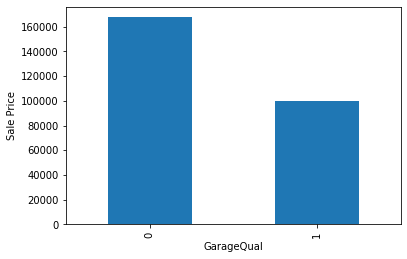

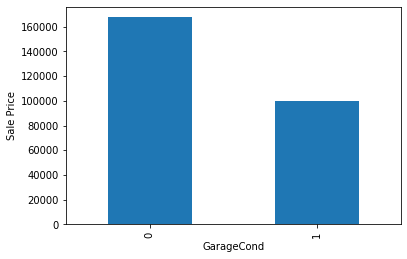

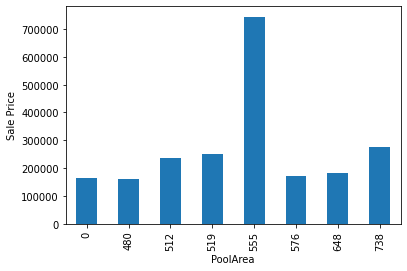

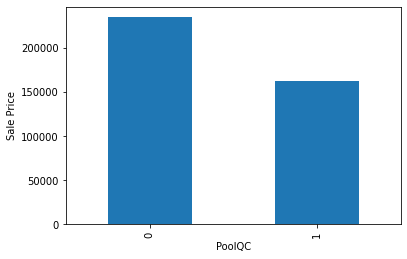

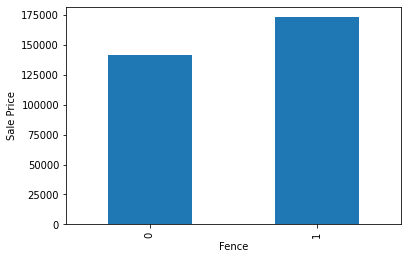

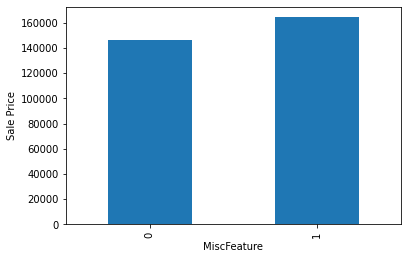

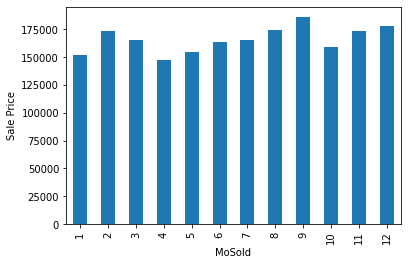

In [14]:
temp=train
for i in discreat:
  temp.groupby(i)['SalePrice'].median().plot.bar()
  plt.xlabel(i)
  plt.ylabel('Sale Price')
  plt.show()

In [15]:
continuous= [ i for i in train.columns if i not in discreat+data_with_year+['id'] and train[i].dtype!=object]

In [21]:
continuous

['LotArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

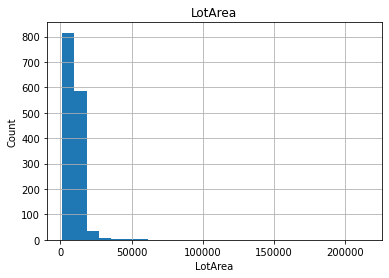

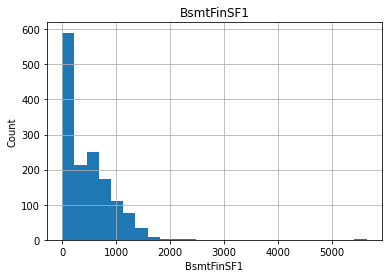

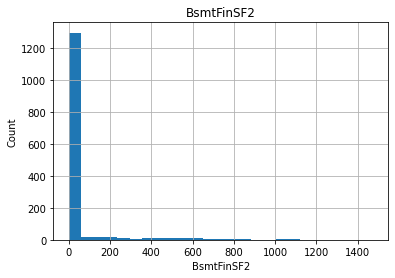

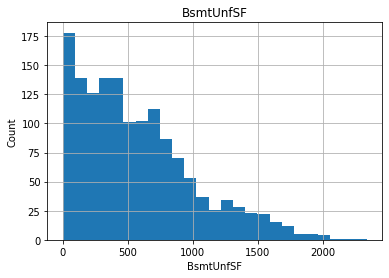

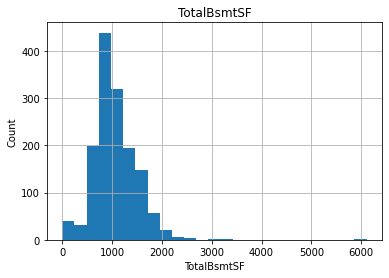

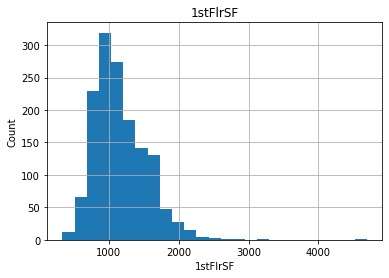

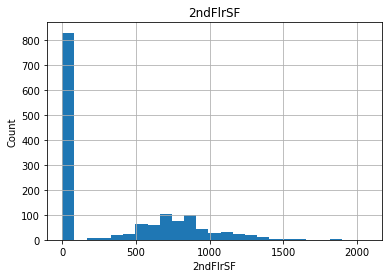

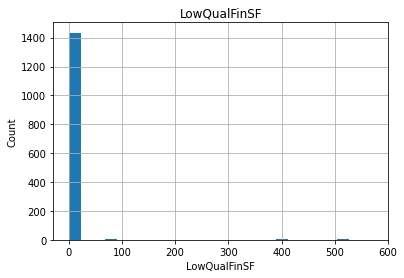

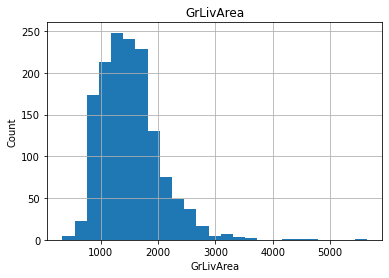

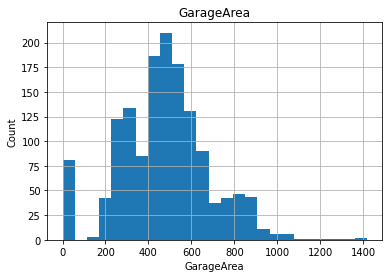

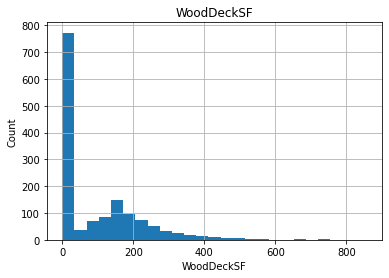

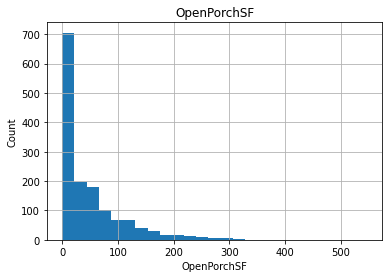

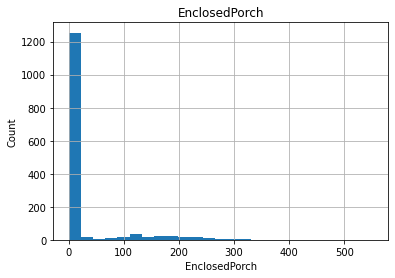

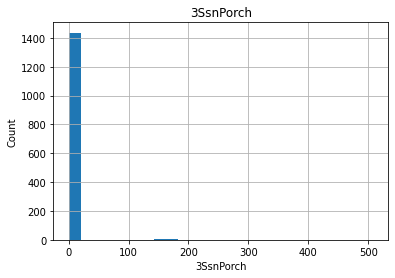

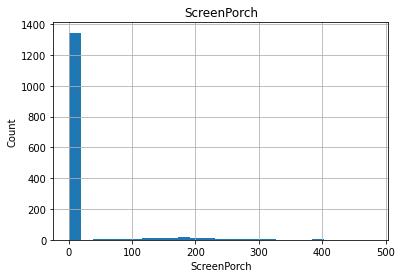

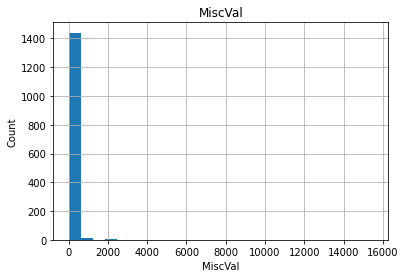

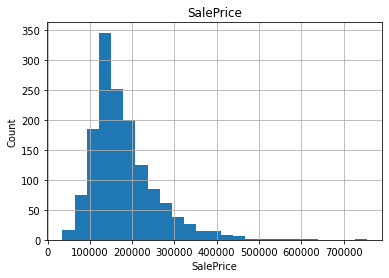

In [39]:
temp=train
for i in continuous:
  temp[i].hist(bins=25)
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.title(i)
  plt.show()

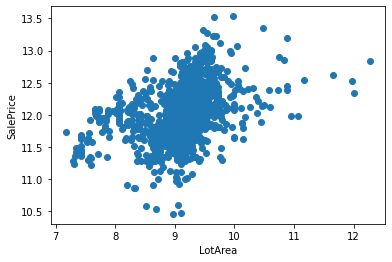

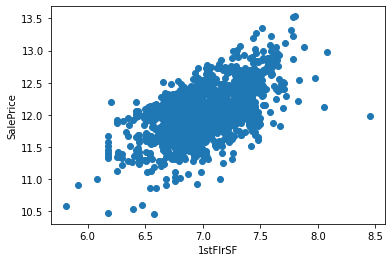

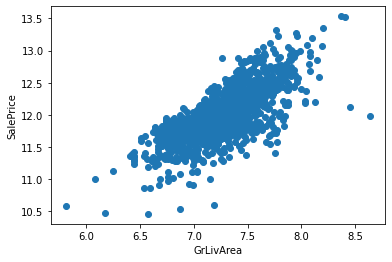

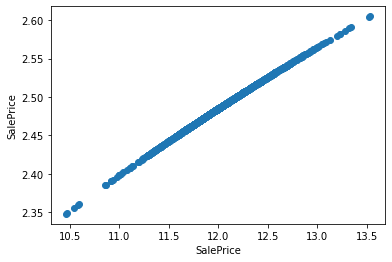

In [40]:
for i in continuous:
  if 0 not in temp[i].unique():
    temp[i]=np.log(temp[i])
    plt.scatter(temp[i],np.log(temp['SalePrice']))
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

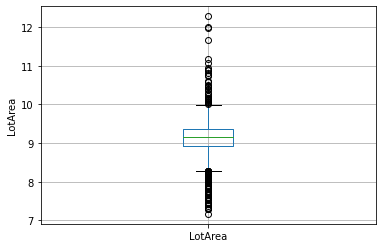

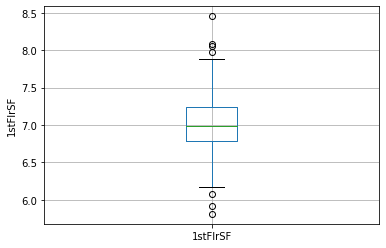

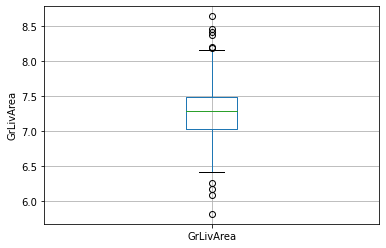

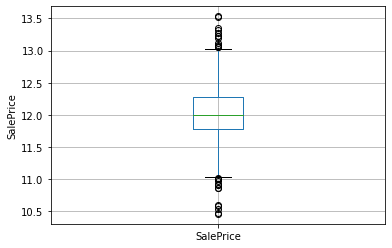

In [43]:
#outliers
for i in continuous:
  if 0 not in train[i].unique():
    temp.boxplot(column=i)
    plt.ylabel(i)
    plt.show()

In [45]:
categorical_features=[i for i in train.columns if train[i].dtype==object]

In [46]:
train[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [48]:
for i in categorical_features:
  print(len(train[i].unique())," ",i)

5   MSZoning
2   Street
3   Alley
4   LotShape
4   LandContour
2   Utilities
5   LotConfig
3   LandSlope
25   Neighborhood
9   Condition1
8   Condition2
5   BldgType
8   HouseStyle
6   RoofStyle
8   RoofMatl
15   Exterior1st
16   Exterior2nd
5   MasVnrType
4   ExterQual
5   ExterCond
6   Foundation
5   BsmtQual
5   BsmtCond
5   BsmtExposure
7   BsmtFinType1
7   BsmtFinType2
6   Heating
5   HeatingQC
2   CentralAir
6   Electrical
4   KitchenQual
7   Functional
6   FireplaceQu
7   GarageType
4   GarageFinish
6   GarageQual
6   GarageCond
3   PavedDrive
4   PoolQC
5   Fence
5   MiscFeature
9   SaleType
6   SaleCondition


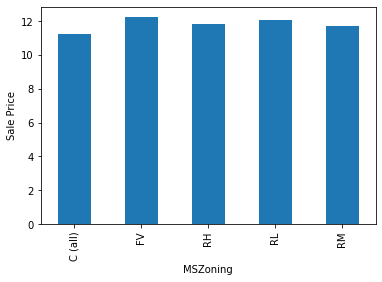

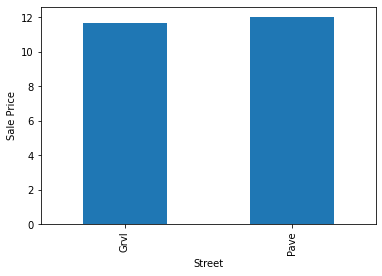

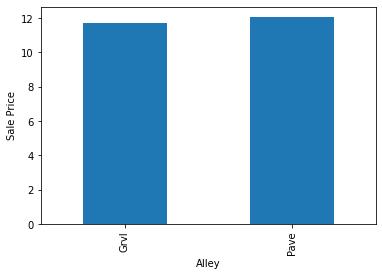

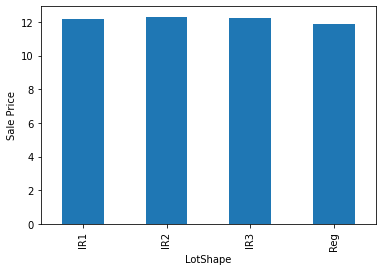

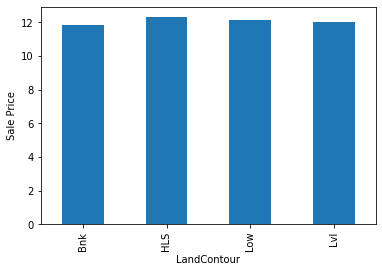

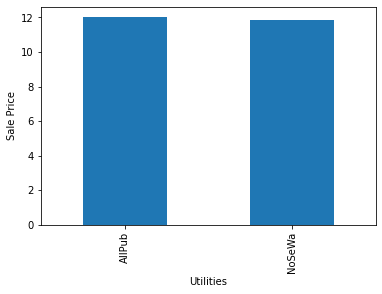

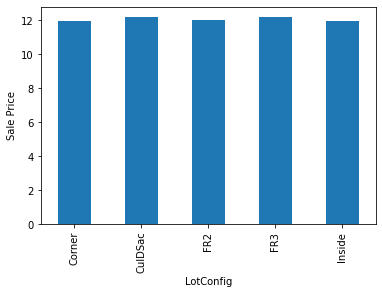

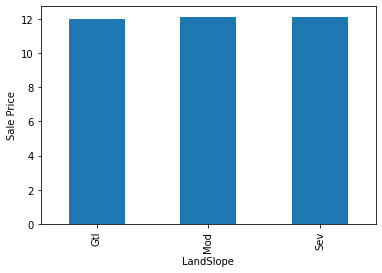

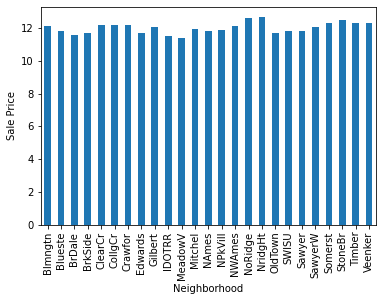

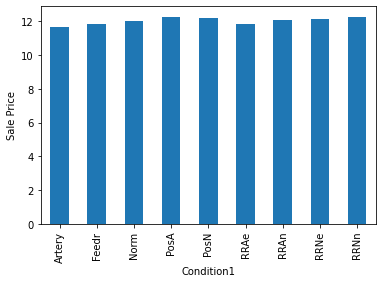

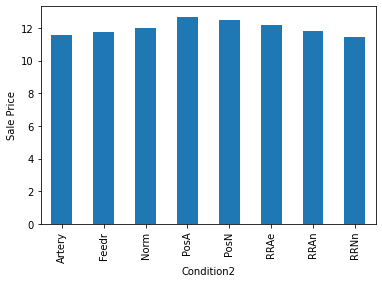

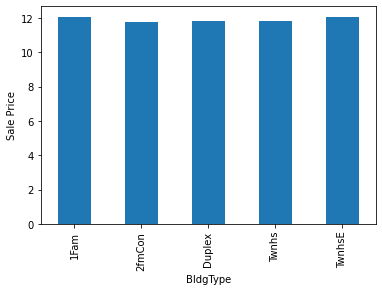

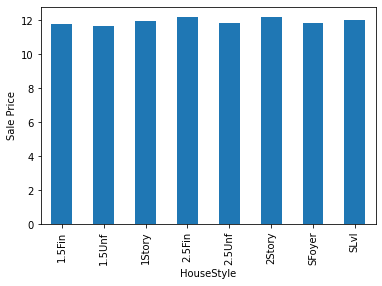

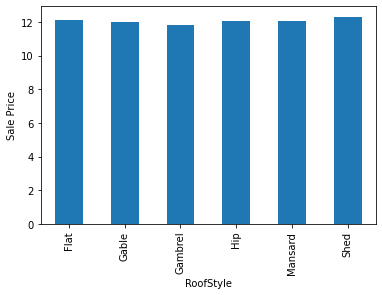

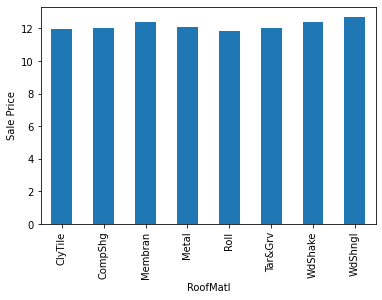

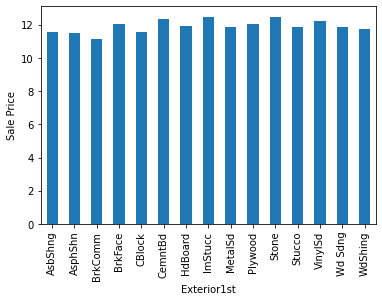

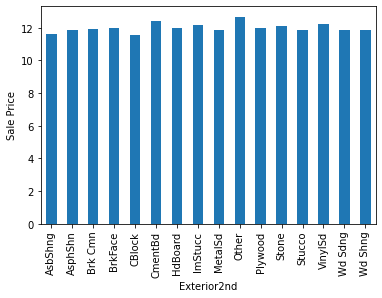

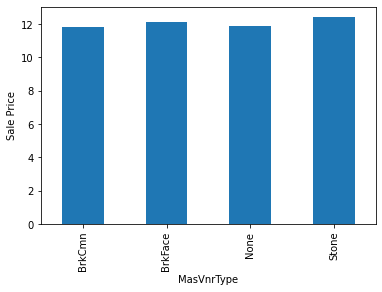

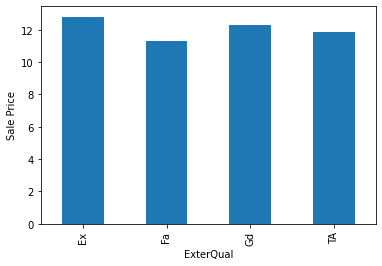

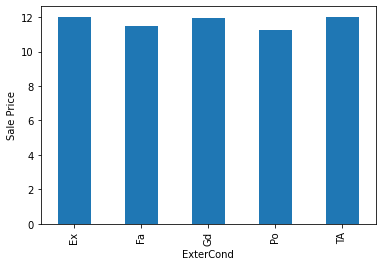

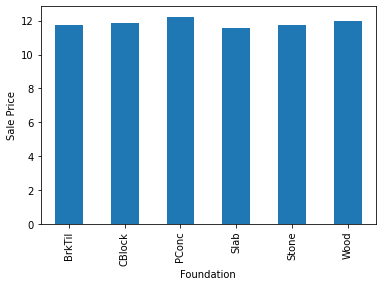

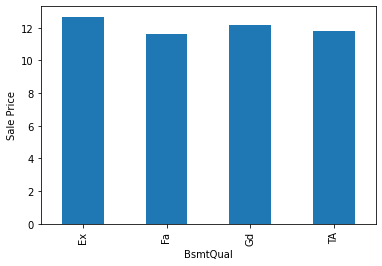

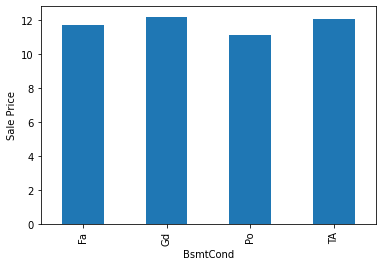

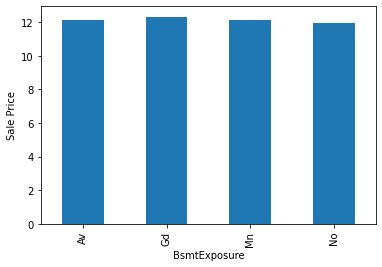

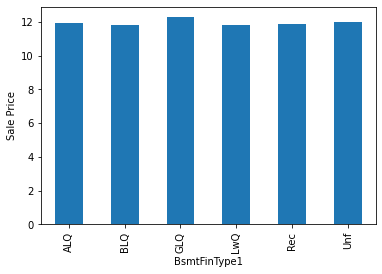

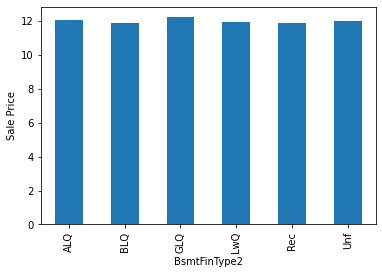

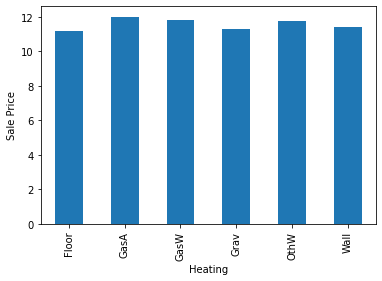

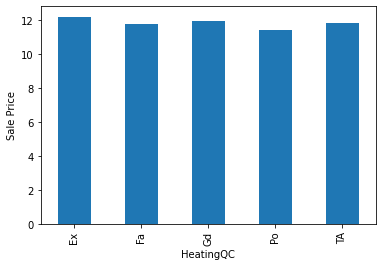

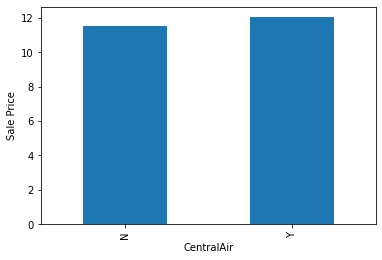

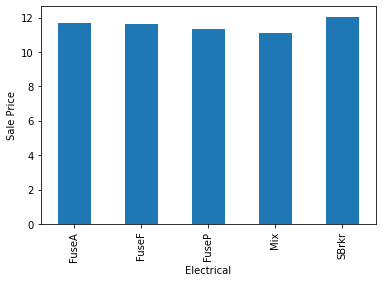

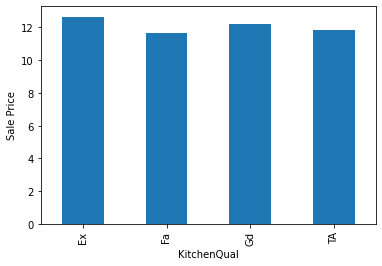

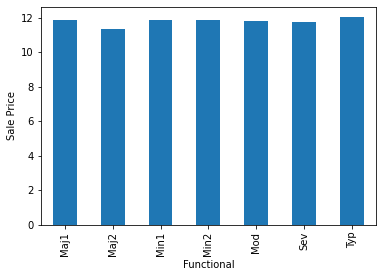

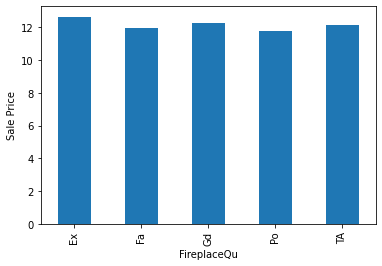

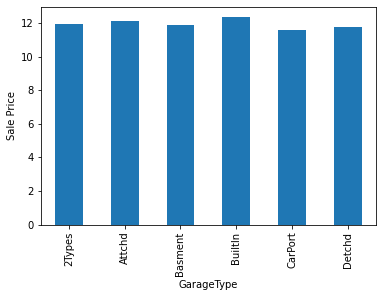

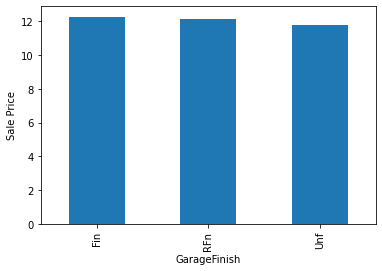

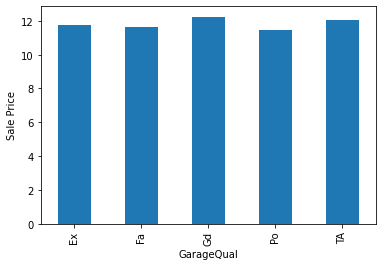

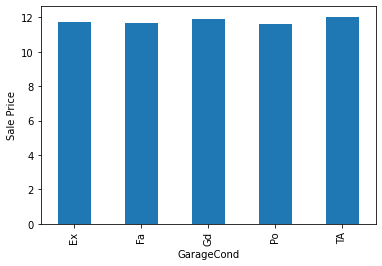

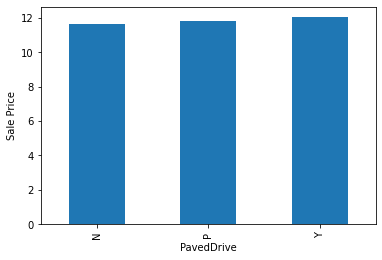

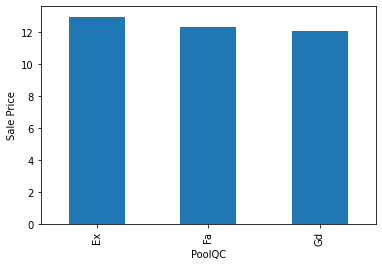

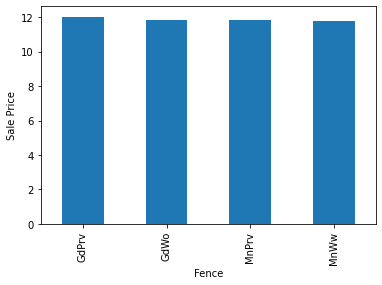

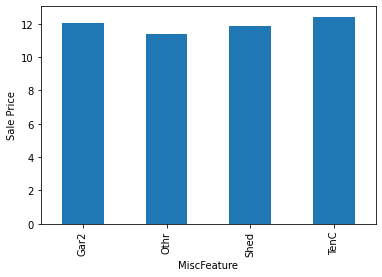

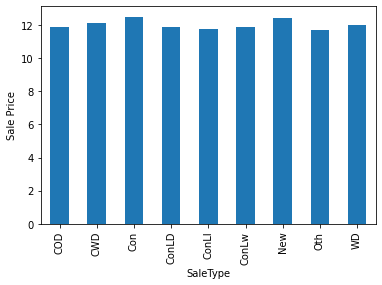

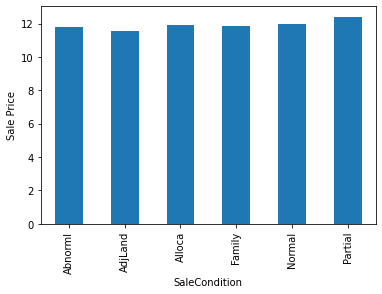

In [51]:
for i in categorical_features:
  temp.groupby(i)['SalePrice'].median().plot.bar()
  plt.xlabel(i)
  plt.ylabel('Sale Price')
  plt.show()

In [53]:
cat_nan=[i for i in categorical_features if train[i].isnull().sum()>1]

for i in cat_nan:
  print(train[i].isnull().sum()," ",i)

1369   Alley
8   MasVnrType
37   BsmtQual
37   BsmtCond
38   BsmtExposure
37   BsmtFinType1
38   BsmtFinType2
690   FireplaceQu
81   GarageType
81   GarageFinish
81   GarageQual
81   GarageCond
1453   PoolQC
1179   Fence
1406   MiscFeature


In [58]:
for i in cat_nan:
  train[i]=train[i].replace(np.nan,'NO')

In [59]:
train[cat_nan].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NO,BrkFace,Gd,TA,No,GLQ,Unf,NO,Attchd,RFn,TA,TA,NO,NO,NO
1,NO,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,NO,NO,NO
2,NO,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,NO,NO,NO
3,NO,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,NO,NO,NO
4,NO,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,NO,NO,NO


In [62]:
num_nan=[i for i in train.columns if train[i].isnull().sum()>0 and train[i].dtype!=object]

for i in num_nan:
  print(train[i].isnull().sum()," ",i)

259   LotFrontage
8   MasVnrArea
81   GarageYrBlt


In [63]:
for i in num_nan:
  median=train[i].median()
  train[i]=train[i].replace(np.nan,median)
train[num_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [64]:
for i in data_with_year:
  if i!='YrSold':
    train[i]=train['YrSold']-train[i]

In [65]:
train[data_with_year].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [66]:
log_normal_dist=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']

for i in log_normal_dist:
  train[i]=np.log(train[i])

In [75]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,2,4.174387,2.201872,0,1,3,3,0,3,0,4,2,0,0,2,7,5,5,5,0,0,8,8,1,196.0,1,3,2,2,4,4,2,706,6,0,150,856,0,0,1,3,1.909879,854,0,2.007442,1,0,2,1,3,1,2,8,4,0,3,0,5.0,2,2,548,3,3,2,0,61,0,0,0,0,0,3,0,0,2,2008,3,2,2.505338
1,2,20,2,4.382027,2.215885,0,1,3,3,0,2,0,16,1,0,0,1,6,8,31,31,0,0,4,4,2,0.0,3,3,1,2,4,1,0,978,6,0,284,1262,0,0,1,3,1.965776,0,0,1.965776,0,1,2,0,3,1,3,6,4,1,5,0,31.0,2,2,460,3,3,2,298,0,0,0,0,0,0,3,0,0,5,2007,3,2,2.493950
2,3,60,2,4.219508,2.233034,0,1,0,3,0,3,0,4,2,0,0,2,7,5,7,6,0,0,8,8,1,162.0,1,3,2,2,4,2,2,486,6,0,434,920,0,0,1,3,1.920501,866,0,2.013266,1,0,2,1,3,1,2,6,4,1,5,0,7.0,2,2,608,3,3,2,0,42,0,0,0,0,0,3,0,0,9,2008,3,2,2.510994
3,4,70,2,4.094345,2.215315,0,1,0,3,0,0,0,5,2,0,0,2,7,5,91,36,0,0,9,10,2,0.0,3,3,0,4,1,4,0,216,6,0,540,756,0,2,1,3,1.926869,756,0,2.007990,1,0,1,0,3,1,2,7,4,1,2,3,8.0,3,3,642,3,3,2,0,35,272,0,0,0,0,3,0,0,2,2006,3,0,2.472277
4,5,60,2,4.430817,2.258133,0,1,0,3,0,2,0,13,2,0,0,2,8,5,8,8,0,0,8,8,1,350.0,1,3,2,2,4,0,2,655,6,0,490,1145,0,0,1,3,1.952057,1053,0,2.040610,1,0,2,1,4,1,2,9,4,1,5,0,8.0,2,3,836,3,3,2,192,84,0,0,0,0,0,3,0,0,12,2008,3,2,2.520050


In [71]:
for i in categorical_features:
  t=train.groupby(i)['SalePrice'].count()/len(train)
  tdf=t[t>0.01].index
  train[i]=np.where(train[i].isin(tdf),train[i],'Rare_var')
  

In [74]:
#feature scaling
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
for i in categorical_features:
  train[i]=le.fit_transform(train[[i]])
fscale=[i for i in train.columns if i not in ['Id','SalePrice']]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyError: ignored

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(train[fscale])

In [81]:
xtrain=pd.concat([train[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(data,columns=fscale)],axis=1)

In [83]:
train=xtrain.drop(['Id','SalePrice'],axis=1)
y=xtrain['SalePrice']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,y,test_size=0.2)